In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.txt to data.txt


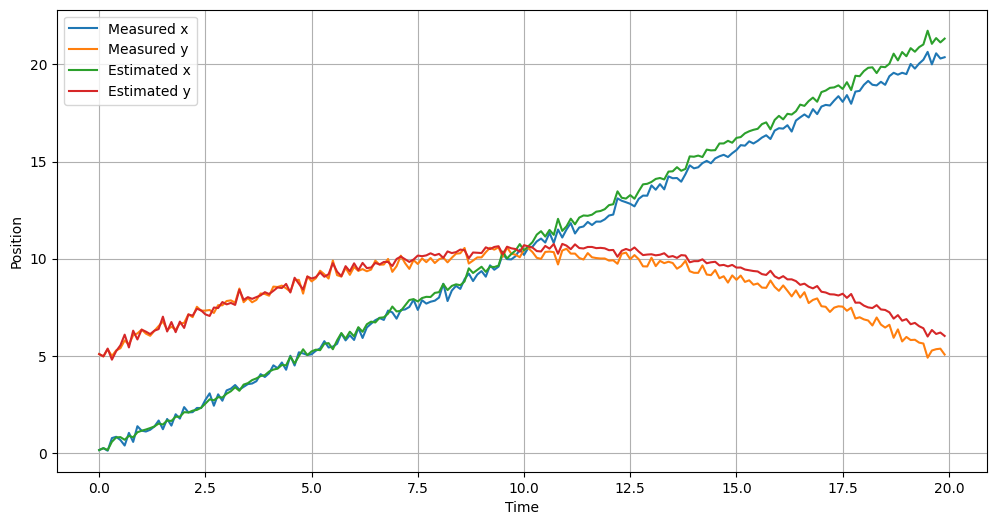

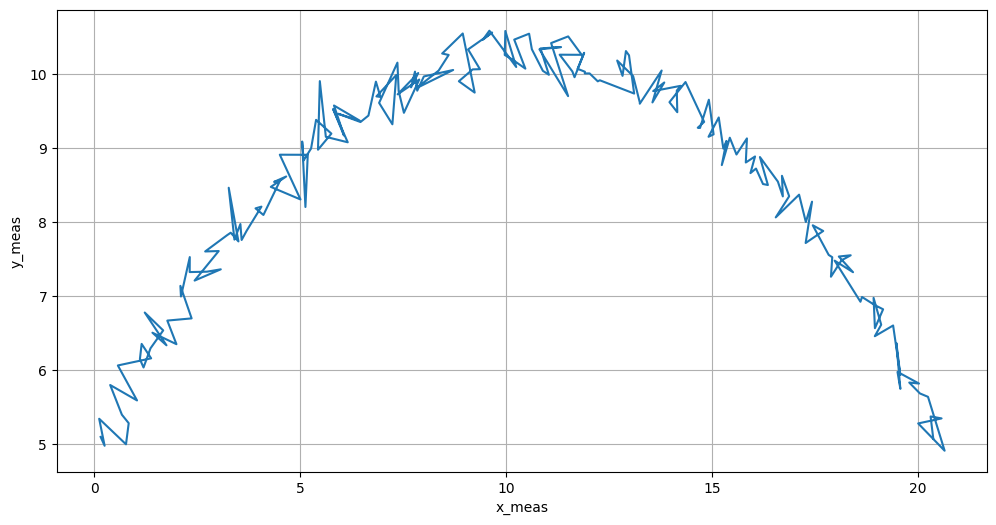

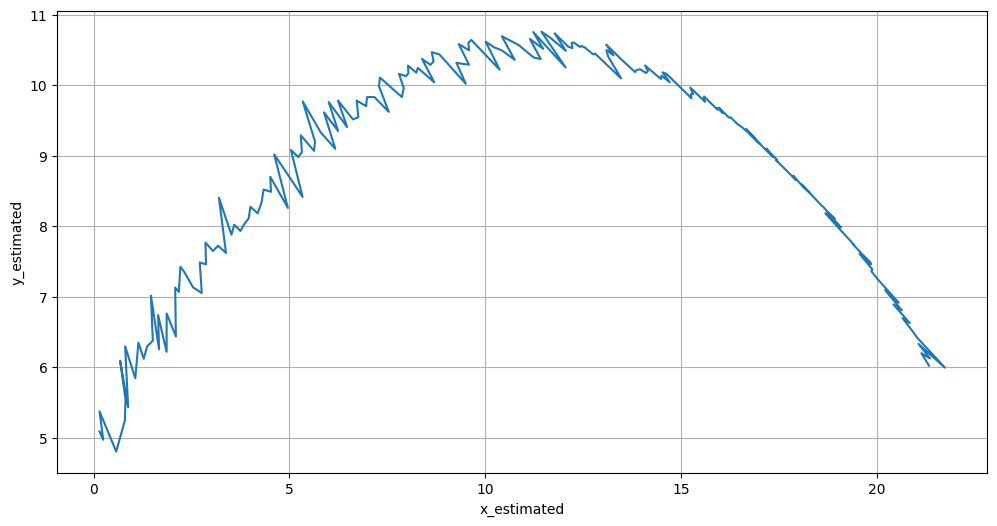

In [29]:
# 3d, e

from numpy import dot
from numpy.linalg import inv
from numpy.linalg import det
import numpy as np
import matplotlib.pyplot as plt
import random

def read_data(filename):

  # Open the file for reading
  with open(filename, 'r') as file:
    # Read the lines from the file
    lines = file.readlines()

  data = []

  for line in lines:
      # Split each line into individual elements using spaces as separators
      elements = line.strip().split()

      # Convert the elements to integers (or floats, if needed)
      row_data = [float(element) for element in elements]

      data.append(row_data)

  # Reshape data to array
  data = np.array(data).reshape(200,7)

  t       = data[: , 0]
  x       = data[: , 1]
  v_x     = data[: , 2]
  y       = data[: , 3]
  v_y     = data[: , 4]
  x_meas  = data[: , 5]
  y_meas  = data[: , 6]


  return t, x, v_x, y, v_y, x_meas, y_meas

def kf_predict(X, P, A, B, C, U, Q):

  X = A @ X + B @ U
  P = A @ P @ A.T + (C * Q) @ C.T

  return(X,P)

def kf_update(X, P, Z, H, D, R):

  S = H @ P @ H.T + (D * R) @ D.T

  K = P @ H.T @ inv(S)
  X = X + K @ (Z - H @ X)
  P = (np.identity(P.shape[0]) - K @ H) @ P

  return (X,P)


# Problem variables
filename = 'data.txt'
g = 1
T = 0.1
sigma_a = 0.04
sigma_o = 0.2

# State Space Matrixes
# x_k+1 = A*x_k + B*u_k + C*w_k
# z_k = H*x_k + D*v_k

# x_k = [x_k, vx_k, y_k, vy_k]
# z_k = [x_meas_k, y_meas_k]


A = np.array([[1, T, 0, 0], [0, 1, 0, 0], [0, 0, 1, T], [0, 0, 0, 1]])
B = np.array([[T*T/2, 0], [T, 0], [0, T], [0, T*T/2]])
C = B # considerar que a = (a + wk) na equaçao de posiçao e ver matrizes
D = np.array([[1], [1]])
H = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])

U = np.array([[0], [-g]])

Q = sigma_a
R = sigma_o

# Initial state
X = np.array([[0], [0], [0], [0]])
P = np.array([[1000, 0, 0, 0], [0, 1000, 0, 0], [0, 0, 1000, 0], [0, 0, 0, 1000]])


# Read the data from the file
t, x, v_x, y, v_y, x_meas, y_meas = read_data(filename)

# Lists to store estimated state variables
estimated_x = []
estimated_v_x = []
estimated_y = []
estimated_v_y = []

# Iterate through the data and apply the Kalman filter
for i in range(len(t)):

    # Predict step
    X, P = kf_predict(X, P, A, B, C, U, Q)

    # Update step with measured data
    Z = np.array([[x_meas[i]], [y_meas[i]]])
    X, P = kf_update(X, P, Z, H, D, R)

    # Store the estimated state variables
    estimated_x.append(X[0, 0])
    estimated_v_x.append(X[1, 0])
    estimated_y.append(X[2, 0])
    estimated_v_y.append(X[3, 0])

# Print the measured and estimated variables
#for i in range(len(t)):
#    print(f"Time: {t[i]}")
#    print(f"Measured x: {x_meas[i]}, Estimated x: {estimated_x[i]}")
#    print(f"Measured y: {y_meas[i]}, Estimated y: {estimated_y[i]}")
#    print(f"Estimated v_x: {estimated_v_x[i]}, Estimated v_y: {estimated_v_y[i]}")
#    print("\n")

# Plot the measured and estimated positions
plt.figure(figsize=(12, 6))
plt.plot(t, x_meas, label="Measured x")
plt.plot(t, y_meas, label="Measured y")
plt.plot(t, estimated_x, label="Estimated x")
plt.plot(t, estimated_y, label="Estimated y")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x_meas, y_meas)
plt.xlabel("x_meas")
plt.ylabel("y_meas")
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(estimated_x, estimated_y)
plt.xlabel("x_estimated")
plt.ylabel("y_estimated")
plt.grid()
plt.show()


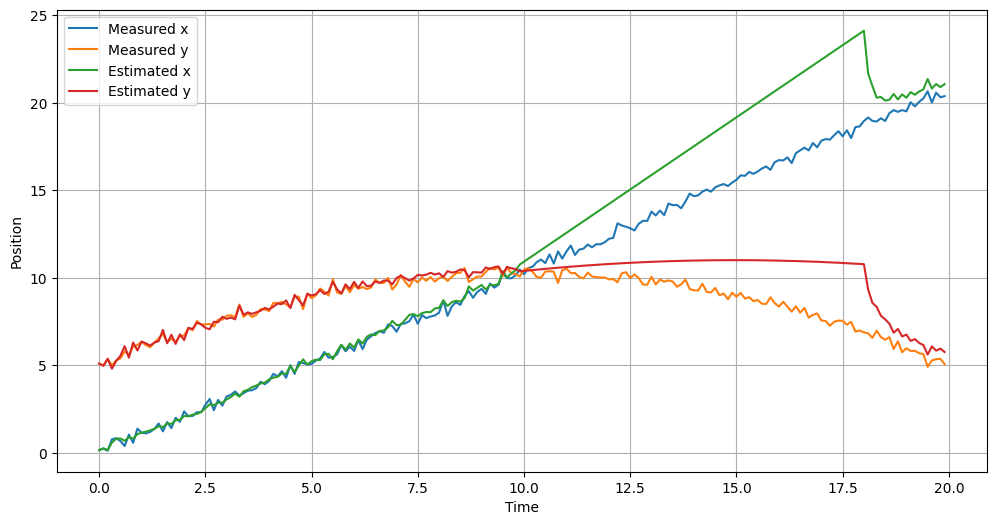

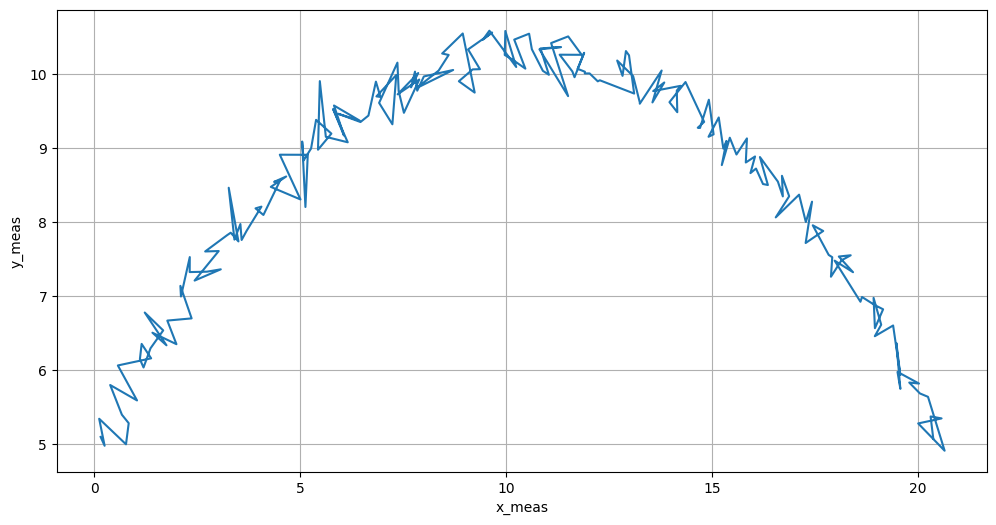

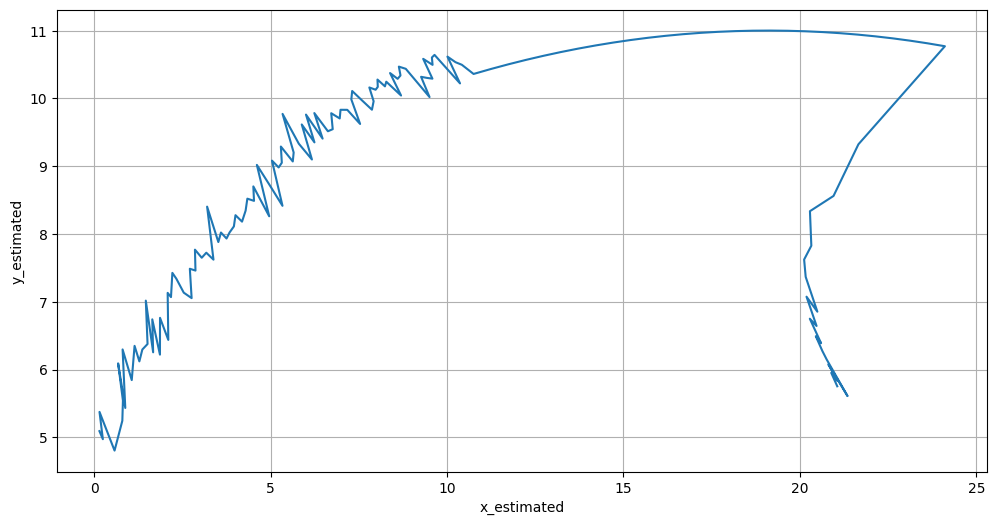

In [30]:
# 3 f

# 3d, e

from numpy import dot
from numpy.linalg import inv
from numpy.linalg import det
import numpy as np
import matplotlib.pyplot as plt
import random

def read_data(filename):

  # Open the file for reading
  with open(filename, 'r') as file:
    # Read the lines from the file
    lines = file.readlines()

  data = []

  for line in lines:
      # Split each line into individual elements using spaces as separators
      elements = line.strip().split()

      # Convert the elements to integers (or floats, if needed)
      row_data = [float(element) for element in elements]

      data.append(row_data)

  # Reshape data to array
  data = np.array(data).reshape(200,7)

  t       = data[: , 0]
  x       = data[: , 1]
  v_x     = data[: , 2]
  y       = data[: , 3]
  v_y     = data[: , 4]
  x_meas  = data[: , 5]
  y_meas  = data[: , 6]


  return t, x, v_x, y, v_y, x_meas, y_meas

def kf_predict(X, P, A, B, C, U, Q):

  X = A @ X + B @ U
  P = A @ P @ A.T + (C * Q) @ C.T

  return(X,P)

def kf_update(X, P, Z, H, D, R):

  S = H @ P @ H.T + (D * R) @ D.T

  K = P @ H.T @ inv(S)
  X = X + K @ (Z - H @ X)
  P = (np.identity(P.shape[0]) - K @ H) @ P

  return (X,P)


# Problem variables
filename = 'data.txt'
g = 1
T = 0.1
sigma_a = 0.04
sigma_o = 0.2

no_meas_start = 10
no_meas_end = 18

# State Space Matrixes
# x_k+1 = A*x_k + B*u_k + C*w_k
# z_k = H*x_k + D*v_k

# x_k = [x_k, vx_k, y_k, vy_k]
# z_k = [x_meas_k, y_meas_k]


A = np.array([[1, T, 0, 0], [0, 1, 0, 0], [0, 0, 1, T], [0, 0, 0, 1]])
B = np.array([[T*T/2, 0], [T, 0], [0, T], [0, T*T/2]])
C = B # considerar que a = (a + wk) na equaçao de posiçao e ver matrizes
D = np.array([[1], [1]])
H = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])

U = np.array([[0], [-g]])

Q = sigma_a
R = sigma_o

# Initial state
X = np.array([[0], [0], [0], [0]])
P = np.array([[1000, 0, 0, 0], [0, 1000, 0, 0], [0, 0, 1000, 0], [0, 0, 0, 1000]])


# Read the data from the file
t, x, v_x, y, v_y, x_meas, y_meas = read_data(filename)

# Lists to store estimated state variables
estimated_x = []
estimated_v_x = []
estimated_y = []
estimated_v_y = []

# Iterate through the data and apply the Kalman filter
for i in range(len(t)):

    # Predict step
    X, P = kf_predict(X, P, A, B, C, U, Q)

    # Update step with measured data
    if no_meas_start <= t[i] <= no_meas_end:
        # No measurements available, skip the update step
        pass
    else:
        # Update step with measured data
        Z = np.array([[x_meas[i]], [y_meas[i]]])
        X, P = kf_update(X, P, Z, H, D, R)

    # Store the estimated state variables
    estimated_x.append(X[0, 0])
    estimated_v_x.append(X[1, 0])
    estimated_y.append(X[2, 0])
    estimated_v_y.append(X[3, 0])

# Print the measured and estimated variables
#for i in range(len(t)):
#    print(f"Time: {t[i]}")
#    print(f"Measured x: {x_meas[i]}, Estimated x: {estimated_x[i]}")
#    print(f"Measured y: {y_meas[i]}, Estimated y: {estimated_y[i]}")
#    print(f"Estimated v_x: {estimated_v_x[i]}, Estimated v_y: {estimated_v_y[i]}")
#    print("\n")

# Plot the measured and estimated positions
plt.figure(figsize=(12, 6))
plt.plot(t, x_meas, label="Measured x")
plt.plot(t, y_meas, label="Measured y")
plt.plot(t, estimated_x, label="Estimated x")
plt.plot(t, estimated_y, label="Estimated y")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x_meas, y_meas)
plt.xlabel("x_meas")
plt.ylabel("y_meas")
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(estimated_x, estimated_y)
plt.xlabel("x_estimated")
plt.ylabel("y_estimated")
plt.grid()
plt.show()
